# Consideraciones de diseño  

Se especificó manualmente la semilla de aleatoriedad de Python para obtener resultados comparables en los escenarios expuestos y para poder reproducir los resultados de los análisis. Adicionalmente, se usaron hyper parametros alpha = 0.3, épsilon = 0.1 y gamma = 0.6 como base de todos los escenarios, con modificaciones para el escenario de taxi y laberinto. Finalmente se adiciono una restricción máxima de 200 pasos para acelerar la convergencia de los escenarios. 

In [1]:
%pip install matplotlib pandas --q


Note: you may need to restart the kernel to use updated packages.


In [2]:
from board import Coordinates, generate_grid_world_board, Grid, generate_labyrinth, generate_taxi, TaxiGrid, GridBlockedPaths
from math import ceil
from matplotlib.pyplot import Rectangle, subplots, rcParams
from q_learning import QLearning, QLearningTaxi
from pandas import DataFrame, set_option

set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('display.width', 150)

rcParams['figure.figsize'] = [12, 8]
rcParams['figure.dpi'] = 100


def plot_scenario(scenario: QLearning):
    _, axes = subplots()
    axes.set_aspect('equal')
    axes.set_xlim(0, scenario.environment.dimensions.x)
    axes.set_ylim(scenario.environment.dimensions.y, 0)
    for x in range(scenario.environment.dimensions.x):
        for y in range(scenario.environment.dimensions.y):
            coordinates = Coordinates(x, y)
            if coordinates in scenario.environment.board:
                value = ceil((scenario.get_value(coordinates)) * 100) / 100
                color = 'white'
                qvalue = scenario.get_policy_qvalue(coordinates)
                if isinstance(scenario, QLearningTaxi):
                    if coordinates == scenario.environment.objective:
                        color = "green"
                    elif coordinates == scenario.environment.passenger:
                        color = "blue"
                    elif coordinates in scenario.environment.objectives:
                        color = "orange"
                else:
                    if coordinates == scenario.environment.objective:
                        color = "green"
                    elif coordinates == scenario.environment.start:
                        color = "blue"
                    elif value < 0:
                        color = "red"
                if qvalue != None:
                    qvalue = ceil(qvalue * 100) / 100
                    action = scenario.get_policy(coordinates)
                    action = "OUT" if action == None else action.name
                else:
                    qvalue = 0
                    action = "None"
                axes.add_patch(Rectangle((x, y), 1, 1, facecolor=color))
                if isinstance(scenario, QLearningTaxi):
                    text = "Con:{}\nQ:{:.2f}\nSin:{}\nQ:{:.2f}".format(scenario.get_policy_passenger(
                        coordinates).name, scenario.get_policy_qvalue_passenger(coordinates), action, qvalue)
                else:
                    text = "{}\nQ:{:.2f}\n{:.2f}".format(action, qvalue, value)
                axes.text(x + 0.5, y + 0.5, text, ha='center', va='center')
            else:
                axes.add_patch(Rectangle((x, y), 1, 1, facecolor='gray'))
    for (first, second) in scenario.environment.blocked_paths:
        if first.x == second.x:
            x = [first.x, first.x + 1]
            y = [second.y, second.y] if first.y < second.y else [first.y, first.y]
            axes.plot(x, y, color="black")
        elif first.y == second.y:
            y = [first.y, second.y + 1]
            x = [second.x, second.x] if first.x < second.x else [first.x, first.x]
            axes.plot(x, y, color="black")


def generate_q_table(scenario: QLearning) -> DataFrame:
    q_table = {"Estado": [], }
    for action in scenario.environment.get_actions():
        q_table[action.name] = []
    q_table["Objetivo"] = []
    for state in sorted(scenario.Q, key=lambda x: (x.x, x.y)):
        if len(scenario.Q[state]) < 2:
            continue
        q_table["Objetivo"].append(
            "Sí" if state == scenario.environment.objective else "No")
        q_table["Estado"].append(f"({state.x}, {state.y})")
        for action in scenario.Q[state]:
            q_table[action.name].append(scenario.Q[state][action])
    return DataFrame(q_table)


random_seed = 5657656


## Q-learning

### Gridworld

El agente toma 22444 muestras para converger valores a 3 decimales


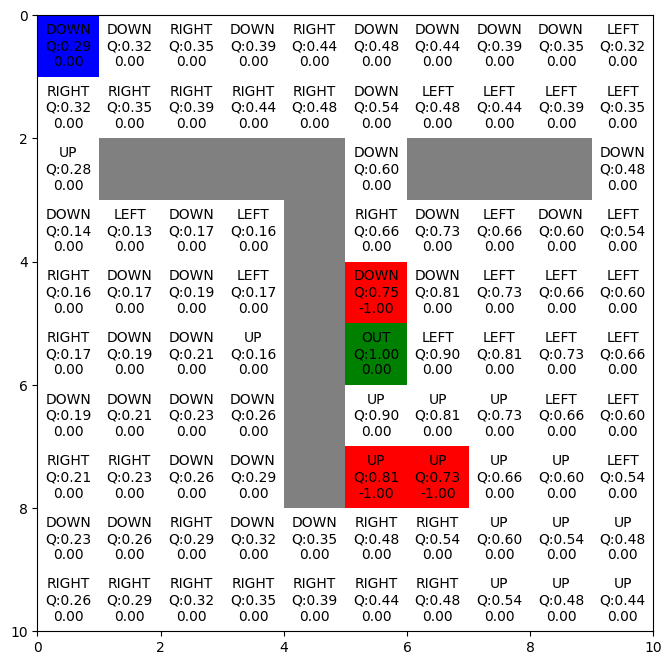

In [3]:
grid_world_board, grid_world_objective, grid_world_start = generate_grid_world_board()
grid_world = Grid(grid_world_board, grid_world_objective, grid_world_start)
q_learning = QLearning(grid_world, random_seed, gamma=0.9)
print(
    f"El agente toma {q_learning.run()} muestras para converger valores a 3 decimales")
plot_scenario(q_learning)


In [4]:
generate_q_table(q_learning)

,Estado,DOWN,LEFT,RIGHT,UP,OUT,Objetivo
0,"(0, 0)",0.282430,0.067349,0.070108,0.026589,0.072108,No
1,"(0, 1)",0.135244,0.233151,0.313811,0.122934,0.142074,No
2,"(0, 2)",0.121577,0.101864,0.108350,0.274758,0.107061,No
3,"(0, 3)",0.135085,0.120629,0.109053,0.109300,0.120221,No
4,"(0, 4)",0.150036,0.135034,0.150095,0.121326,0.135055,No
5,"(0, 5)",0.153037,0.108522,0.166772,0.097871,0.145073,No
6,"(0, 6)",0.185302,0.153034,0.137188,0.130269,0.085054,No
7,"(0, 7)",0.178379,0.182639,0.205891,0.166128,0.160808,No
8,"(0, 8)",0.228768,0.105004,0.190288,0.140811,0.061767,No
9,"(0, 9)",0.219721,0.173841,0.254187,0.156456,0.201854,No


Como podemos observar, qlearning dio una buena política para el escenario de gridworld, evitando en lo posible a las trampas y haciendo que las políticas generen un camino que inevitablemente llegue al estado de salida. Sin embargo, también podemos apreciar que estas no son las políticas óptimas debido a que se puede llegar de forma más rápida al estado final en muchas de las casillas, principalmente en el sector izquierdo del mapa en donde evidenciamos más fácilmente esta situación, por lo que podemos asumir que el agente no tiene hyper parametros o recompensas óptimas para este escenario, o que realmente necesita más iteraciones para converger a la política más optima. 

### Laberinto

El agente toma 17239 muestras para converger valores a 3 decimales


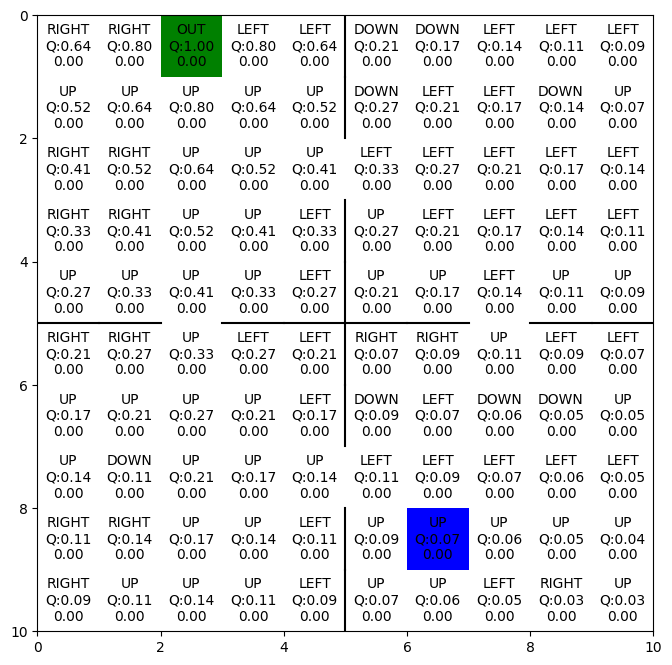

In [5]:
labyrinth_board, labyrinth_blocked_paths, labyrinth_objective, labyrinth_start = generate_labyrinth()
labyrinth = GridBlockedPaths(
    labyrinth_board, labyrinth_objective, labyrinth_start, labyrinth_blocked_paths)
q_learning = QLearning(labyrinth, random_seed, gamma=0.8)
print(
    f"El agente toma {q_learning.run()} muestras para converger valores a 3 decimales")
plot_scenario(q_learning)


In [6]:
generate_q_table(q_learning)

,Estado,DOWN,LEFT,RIGHT,UP,OUT,Objetivo
0,"(0, 0)",0.330134,0.354732,0.640000,0.425177,0.389066,No
1,"(0, 1)",0.327680,0.279440,0.336384,0.512000,0.314786,No
2,"(0, 2)",0.186931,0.293842,0.409600,0.206445,0.238680,No
3,"(0, 3)",0.192395,0.209340,0.327680,0.272578,0.246982,No
4,"(0, 4)",0.062472,0.124837,0.133693,0.262144,0.137566,No
5,"(0, 5)",0.129439,0.156608,0.209715,0.154475,0.162297,No
6,"(0, 6)",0.066322,0.088181,0.144982,0.167772,0.058121,No
7,"(0, 7)",0.064242,0.005160,0.010555,0.134218,0.041186,No
8,"(0, 8)",0.037891,0.052653,0.107374,0.053283,0.036366,No
9,"(0, 9)",0.056046,0.041232,0.085899,0.033665,0.040178,No


De igual forma que con el escenario de gridworld, podemos ver que, si bien las políticas siempre terminan llegando al objetivo, también podemos ver la falta de optimización en las mismas. No obstante, podemos apreciar que hay una menor cantidad de políticas no óptimas en este escenario, principalmente en el cuadrante más lejano, lo cual sigue concordando con el escenario de gridworld con políticas no óptimas a medida que se alejan de la recompensa, donde se espera que se encuentren menos muestras. 

### Taxi

El agente toma 5600 muestras para converger valores a 3 decimales


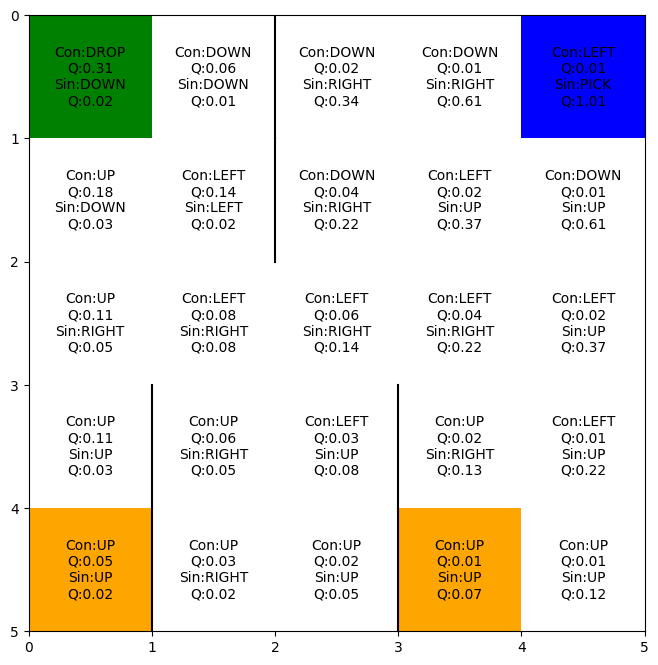

In [7]:
taxi_board, taxi_blocked_paths, taxi_objective, taxi_start = generate_taxi()
taxi = TaxiGrid(taxi_board, taxi_objective, taxi_start, taxi_blocked_paths)
q_learning = QLearningTaxi(taxi, random_seed, alpha=0.1, epsilon=0.3)
print(
    f"El agente toma {q_learning.run()} muestras para converger valores a 3 decimales")
plot_scenario(q_learning)


In [8]:
q_table = { "Estado": [],  }
for action in q_learning.environment.get_actions():
    q_table[action.name] = []
q_table["Estación"] = []
for state, passenger in sorted(q_learning.Q, key=lambda x: (x[0].x, x[0].y, x[1])):
    if len(q_learning.Q[(state, passenger)]) < 2:
        continue
    q_table["Estación"].append("Sí" if state in q_learning.environment.objectives else "No")
    q_table["Estado"].append(("Con pasajero" if passenger else "Sin pasajero") + f" ({state.x}, {state.y})")
    for action in q_learning.Q[(state, passenger)]:
        q_table[action.name].append(q_learning.Q[(state, passenger)][action])
DataFrame(q_table)

,Estado,DOWN,LEFT,RIGHT,UP,PICK,DROP,Estación
0,"Sin pasajero (0, 0)",1.460042e-02,5.635938e-04,0.000000,0.000000,-2.913776,-4.094582,Sí
1,"Con pasajero (0, 0)",1.276247e-01,5.110944e-02,0.050546,0.052772,-9.937783,0.306623,Sí
2,"Sin pasajero (0, 1)",2.802304e-02,6.651662e-03,0.002534,0.004470,-9.930067,-9.948462,No
3,"Con pasajero (0, 1)",6.653178e-02,1.047094e-01,0.059929,0.183688,-9.834779,-9.849925,No
4,"Sin pasajero (0, 2)",5.807237e-03,1.496163e-02,0.046855,0.009493,-9.482687,-8.768309,No
5,"Con pasajero (0, 2)",4.936976e-02,5.926110e-02,0.059138,0.114849,-9.920512,-9.904097,No
6,"Sin pasajero (0, 3)",2.012613e-08,2.902554e-03,0.000000,0.027236,-7.709582,-6.125795,No
7,"Con pasajero (0, 3)",1.919924e-02,3.118509e-02,0.033084,0.105278,-9.467714,-9.593144,No
8,"Sin pasajero (0, 4)",4.697650e-04,2.851508e-07,0.000242,0.011352,-3.194404,-4.684297,Sí
9,"Con pasajero (0, 4)",1.679541e-02,1.085672e-02,0.012375,0.049049,-9.825355,-7.343915,Sí


En este escenario podemos ver un comportamiento que parece más aleatorio que los escenarios anteriores gracias a la naturaleza del problema. Sin embargo, analizando la qtabla y las políticas de la iteración final, podemos comprender que este comportamiento es lógico. Por un lado, las políticas favorecen la última iteración ya que las estaciones del pasajero y el objetivo son aleatorias, por lo que gracias a estos valores aleatorios que se contrarrestan entre sí y a los hyper parámetros usados, las últimas iteraciones tiene más peso sobre los qvalores, dando prioridad a las políticas resultantes. Por el otro lado, tenemos la información de la qtabla, la cual indica valores muy cercanos entre todas las acciones, siendo la excepción drop y pick, los cuales tienden a tener un valor negativo cercano a -10, debido a la gran penalización de ejecutar estas acciones de manera indebida y a la inhabilidad del agente de saber cuál es la estación del pasajero y objetivo para la iteración actual, siendo la excepción las estaciones involucradas en las últimas iteraciones por los motivos mencionados anteriormente. 